Importing the libraries and the data


In [1]:
#Importing Necessary Libraries.
from PIL import Image
import numpy as np
import os
import cv2
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

Using TensorFlow backend.


In [2]:
print(os.listdir('./cell_images/cell_images'))

['Parasitized', 'Uninfected']


In [3]:
infectados = os.listdir('./cell_images/cell_images/Parasitized/')
saudaveis = os.listdir('./cell_images/cell_images/Uninfected/')

In [4]:
data = []
labels = []

#we'll save 3 images from each image, one rotated 30º and another rotated 60° from the original

for i in infectados:
    try:
    
        image = cv2.imread("./cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated30 = resize_img.rotate(30)
        rotated60 = resize_img.rotate(60)
        blur = cv2.blur(np.array(resize_img) ,(10,10))
        data.append(np.array(resize_img))
        data.append(np.array(rotated30))
        data.append(np.array(rotated60))
        data.append(np.array(blur))
        labels.append(1)
        labels.append(1)
        labels.append(1)
        labels.append(1)
        
    except AttributeError:
        print('')
    
for s in saudaveis:
    try:
        
        image = cv2.imread("./cell_images/cell_images/Uninfected/"+s)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50))
        rotated30 = resize_img.rotate(30)
        rotated60 = resize_img.rotate(60)
        data.append(np.array(resize_img))
        data.append(np.array(rotated30))
        data.append(np.array(rotated60))
        labels.append(0)
        labels.append(0)
        labels.append(0)
        
    except AttributeError:
        print('')

In [6]:
celulas = np.array(data)
classes = np.array(labels)


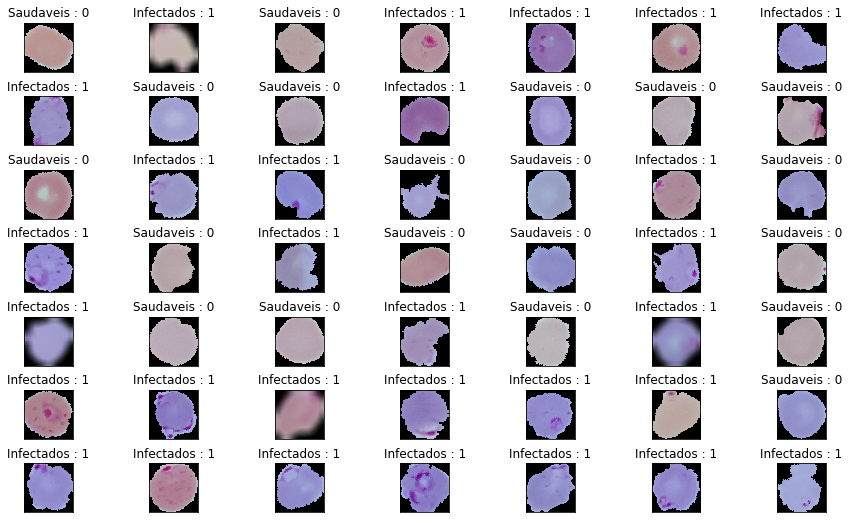

In [83]:
import matplotlib.pyplot as plt
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint(0 , celulas.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(celulas[r[0]])
    plt.title('{} : {}'.format('Infectados' if classes[r[0]] == 1 else 'Saudaveis' ,
                               classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])
    
plt.show()

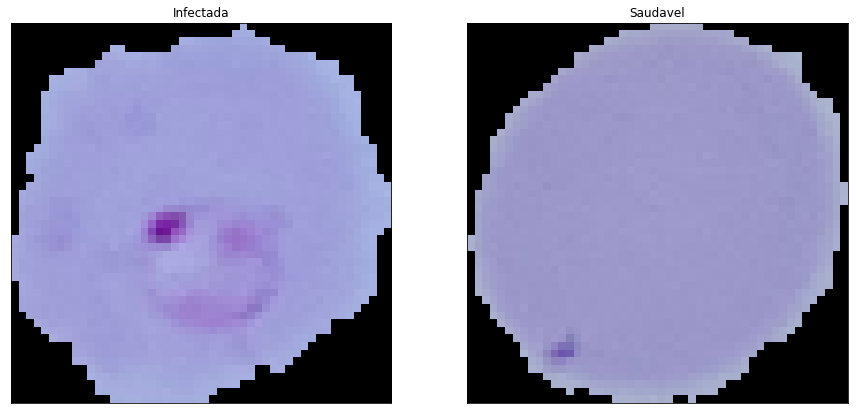

In [8]:
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(celulas[0])
plt.title('Infectada')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(celulas[60000])
plt.title('Saudavel')
plt.xticks([]) , plt.yticks([])

plt.show()

In [9]:
np.random.seed(0)

n = np.arange(celulas.shape[0])
np.random.shuffle(n)
cells = celulas[n]
labels = classes[n]

In [10]:
cells = cells.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255

In [11]:
from sklearn.model_selection import train_test_split

X , x_test , y , y_test = train_test_split(cells , labels , 
                                            test_size = 0.2 ,
                                            random_state = 111)

X_tr , X_val , y_tr , y_val = train_test_split(X , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

In [12]:
num_classes=len(np.unique(labels))
len_data=len(cells)

y_tr = keras.utils.to_categorical(y_tr,num_classes)
y_val = keras.utils.to_categorical(y_val,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

In [13]:
print(y_tr.shape, y_val.shape, X_tr.shape, X_val.shape)

(38581, 2) (38581, 2) (38581, 50, 50, 3) (38581, 50, 50, 3)


In [14]:
#creating the architecture of our neural network 

model = Sequential()

model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(2,activation="sigmoid")) # we're using 0 to healthy cells and 1 to infected cells 
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxP

In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_tr,y_tr,validation_data=(X_val, y_val),batch_size=50,epochs=10,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 38581 samples, validate on 38581 samples
Epoch 1/10
38581/38581 [==============================] - 64s 2ms/step - loss: 0.2553 - acc: 0.8917 - val_loss: 0.1388 - val_acc: 0.9545
Epoch 2/10
38581/38581 [==============================] - 47s 1ms/step - loss: 0.1259 - acc: 0.9600 - val_loss: 0.1279 - val_acc: 0.9589
Epoch 3/10
38581/38581 [==============================] - 47s 1ms/step - loss: 0.1144 - acc: 0.9630 - val_loss: 0.1136 - val_acc: 0.9617
Epoch 4/10
38581/38581 [==============================] - 47s 1ms/step - loss: 0.1072 - acc: 0.9646 - val_loss: 0.1084 - val_acc: 0.9642
Epoch 5/10
38581/38581 [==============================] - 47s 1ms/step - loss: 0.1004 - acc: 0.9660 - val_loss: 0.1053 - val_acc: 0.9653
Epoch 6/10
38581/38581 [==============================] - 47s 1ms/step - loss: 0.0968 - acc: 0.9672 - val_loss: 0.1149 - val_acc: 0.9629
Epoch 7/10
38581/38581 [==============================] - 47s 1ms/step - loss: 0

In [17]:
score = model.evaluate(x_test, y_test, verbose=1)

19291/19291 [==============================] - 8s 403us/step


In [18]:

pred = model.predict(x_test, verbose=1)

19291/19291 [==============================] - 6s 331us/step


In [19]:
from keras.models import load_model
model.save('cells.h5')

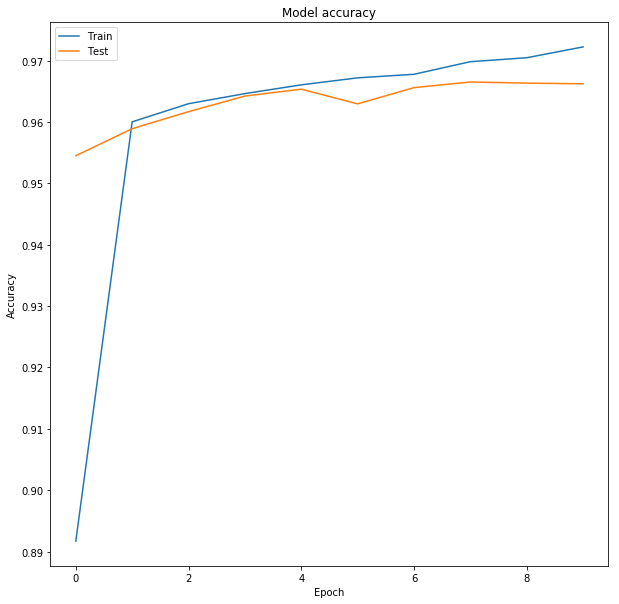

In [20]:
# Plot training & validation accuracy values
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

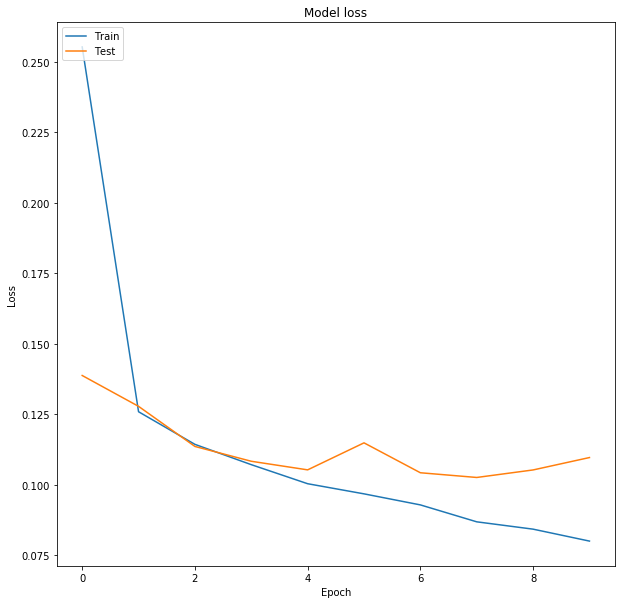

In [21]:
# Plot training & validation loss values
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 128)         32896     
__________

In [23]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_tr[20].reshape(1,50,50,3))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

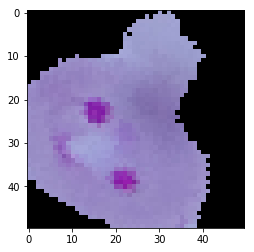

In [24]:
plt.imshow(X_tr[20][:,:,:]);

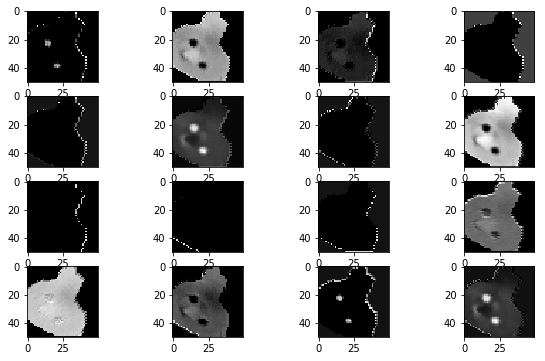

In [25]:
display_activation(activations, 4, 4, 0)

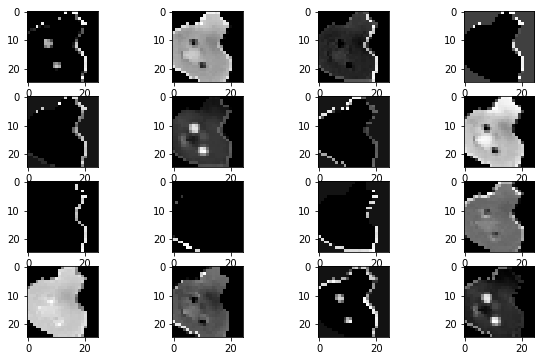

In [26]:
display_activation(activations, 4, 4, 1)

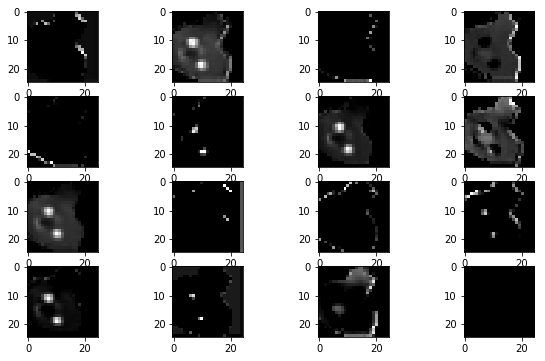

In [27]:
display_activation(activations, 4, 4, 2)

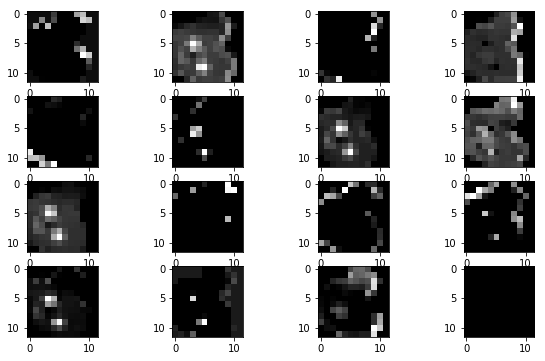

In [28]:
display_activation(activations, 4, 4, 3)

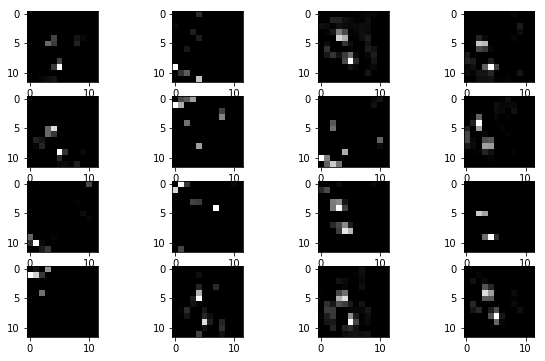

In [29]:
display_activation(activations, 4, 4, 4)

Now we're importing some famous models as ResNet, VGG16 and VGG19, doing some transfer learning and we'll compare how they perform in our dataset

In [84]:
from sklearn import metrics

[0. 0. 0. ... 0. 0. 0.]


In [85]:
conf = metrics.confusion_matrix(y_test[:,0], np.around(pred[:,0]))
conf_norm = conf/conf.sum(axis=1)
print(conf_norm)

[[0.96193397 0.05143205]
 [0.02291178 0.96904327]]


In [58]:
from keras.applications.mobilenet import MobileNet


In [59]:
mobile_model = MobileNet(input_shape=(50,50,3), alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=False, weights=None, input_tensor=None, pooling=None, classes=2)

In [63]:
x = mobile_model.output
x = Flatten()(x)
preds = Dense(2,activation='softmax')(x) #final layer with softmax activation
mobile_model=Model(inputs=mobile_model.input,outputs=preds)
mobile_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 50, 50, 3)         0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 51, 51, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 25, 25, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 25, 25, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 25, 25, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 25, 25, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 25, 25, 32)        128       
__________

In [64]:
mobile_model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history_mobile = mobile_model.fit(X_tr,y_tr,validation_data=(X_val, y_val),batch_size=128,epochs=10,verbose=1)

Train on 38581 samples, validate on 38581 samples
Epoch 1/10
38581/38581 [==============================] - 198s 5ms/step - loss: 0.5437 - acc: 0.7235 - val_loss: 0.5570 - val_acc: 0.7291
Epoch 2/10
38581/38581 [==============================] - 186s 5ms/step - loss: 0.3540 - acc: 0.8367 - val_loss: 0.6614 - val_acc: 0.7482
Epoch 3/10
38581/38581 [==============================] - 186s 5ms/step - loss: 0.2070 - acc: 0.9165 - val_loss: 0.4761 - val_acc: 0.8011
Epoch 4/10
38581/38581 [==============================] - 186s 5ms/step - loss: 0.1345 - acc: 0.9500 - val_loss: 0.1943 - val_acc: 0.9228
Epoch 5/10
38581/38581 [==============================] - 186s 5ms/step - loss: 0.1060 - acc: 0.9610 - val_loss: 0.1600 - val_acc: 0.9431
Epoch 6/10
38581/38581 [==============================] - 186s 5ms/step - loss: 0.0892 - acc: 0.9672 - val_loss: 0.1900 - val_acc: 0.9413
Epoch 7/10
38581/38581 [==============================] - 186s 5ms/step - loss: 0.0777 - acc: 0.9713 - val_loss: 0.2340 - 

In [65]:
score_mobile = mobile_model.predict(x_test, verbose=1)

19291/19291 [==============================] - 31s 2ms/step


In [68]:
conf_mob = metrics.confusion_matrix(y_test[:,0], np.around(score_mobile[:,0]))
conf_mob_norm = conf_mob/conf_mob.sum(axis=1)
print(conf_mob_norm)

[[0.95616092 0.05923218]
 [0.06061699 0.91809872]]


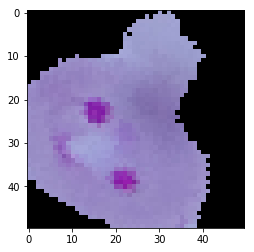

In [71]:
layer_outputs = [layer.output for layer in mobile_model.layers[1:]]
activation_model = Model(inputs=mobile_model.input, outputs=layer_outputs)
activations_mob = activation_model.predict(X_tr[20].reshape(1,50,50,3))
plt.imshow(X_tr[20][:,:,:]);


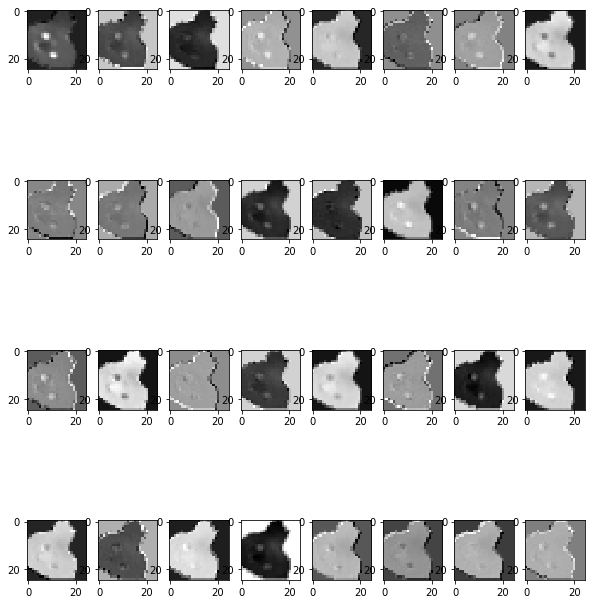

In [92]:
display_activation(activations_mob, 8, 4, 1)

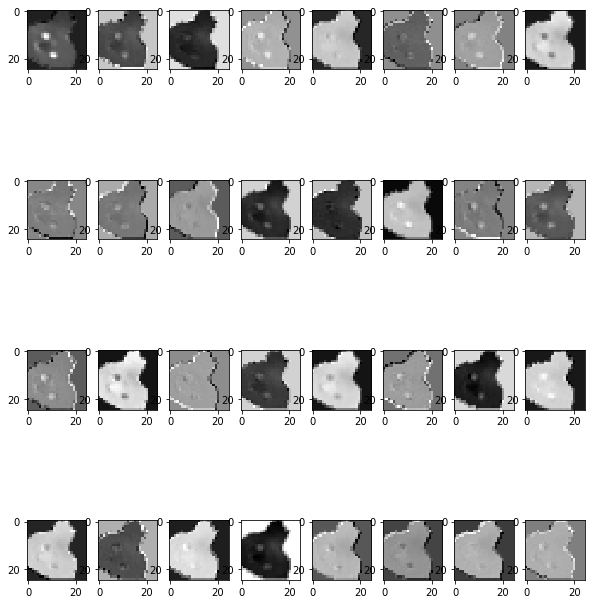

In [93]:
display_activation(activations_mob, 8, 4, 2)

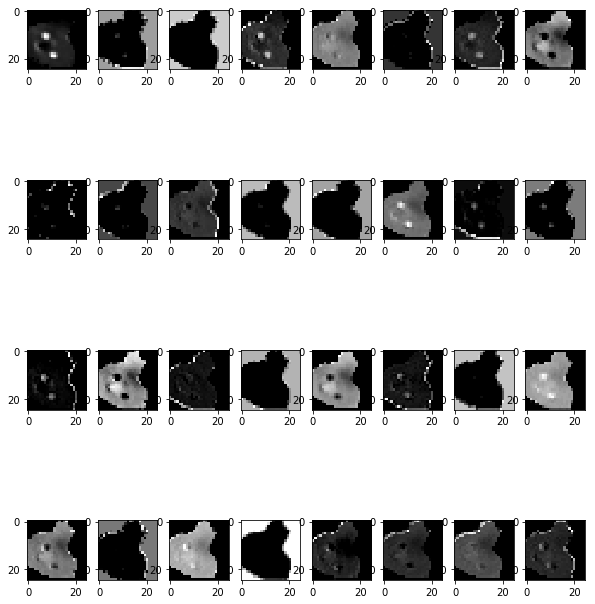

In [94]:
display_activation(activations_mob, 8, 4, 3)

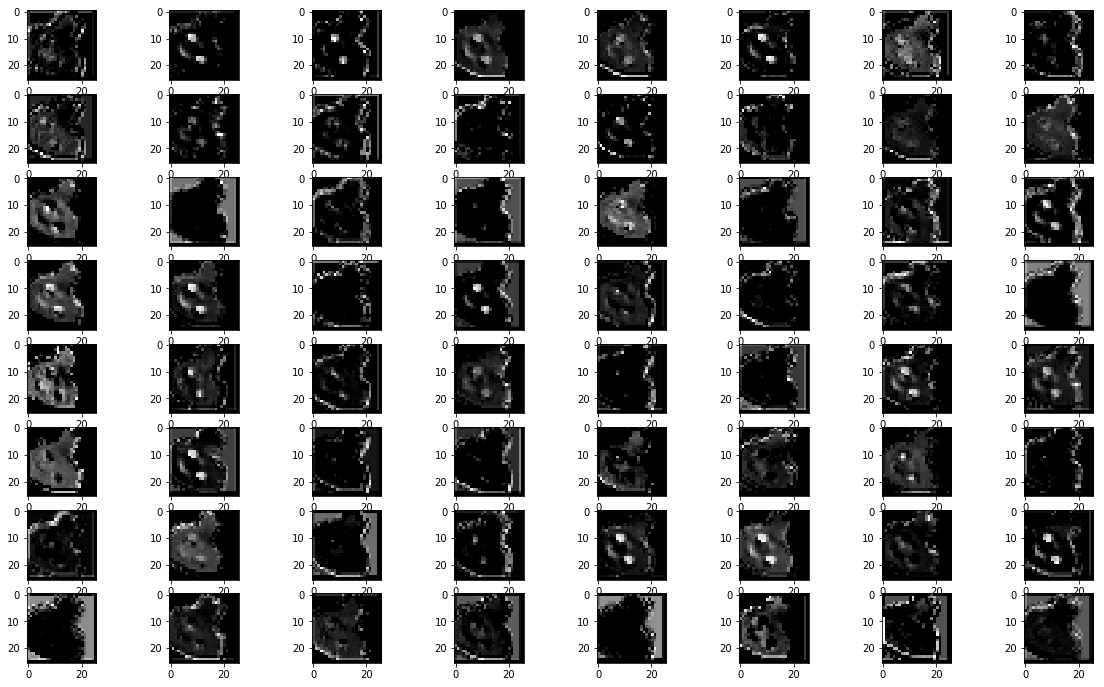

In [81]:
display_activation(activations_mob, 8, 8, 10)

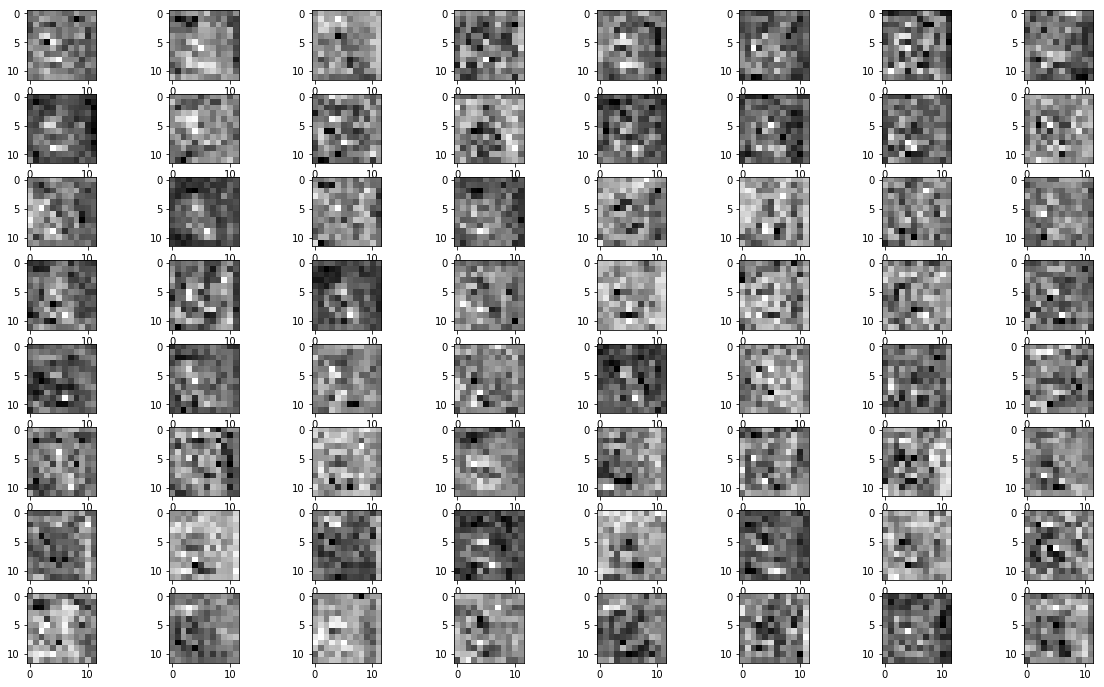

In [82]:
display_activation(activations_mob, 8, 8, 20)

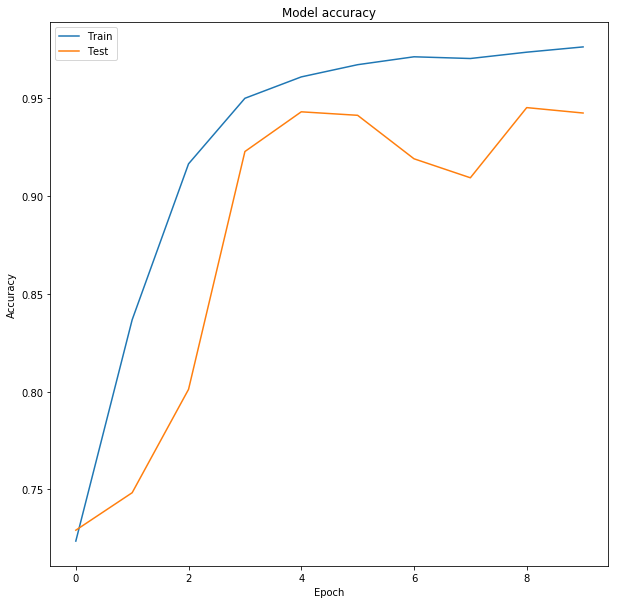

In [86]:
# Plot training & validation accuracy values
plt.figure(figsize=(10,10))
plt.plot(history_mobile.history['acc'])
plt.plot(history_mobile.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

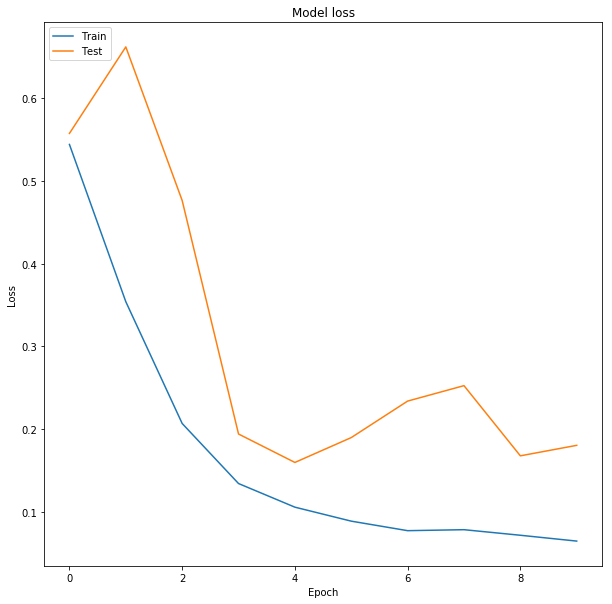

In [87]:
# Plot training & validation loss values
plt.figure(figsize=(10,10))
plt.plot(history_mobile.history['loss'])
plt.plot(history_mobile.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [89]:
model.evaluate(x_test, y_test, verbose=1)

19291/19291 [==============================] - 11s 558us/step


[0.10516307015149826, 0.9648281581868626]

In [91]:
mobile_model.evaluate(x_test, y_test, verbose=1)

19291/19291 [==============================] - 29s 1ms/step


[0.18275630475365104, 0.939972007650343]